In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [37]:
# Load the dataset
df = pd.read_csv('Online Retail Shipping/Online Retail Shipping.csv')

# Display the first few rows of the dataset
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# Data Cleaning

In [39]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

missing_values, duplicates

(ID                     0
 Warehouse_block        0
 Mode_of_Shipment       0
 Customer_care_calls    0
 Customer_rating        0
 Cost_of_the_Product    0
 Prior_purchases        0
 Product_importance     0
 Gender                 0
 Discount_offered       0
 Weight_in_gms          0
 Reached.on.Time_Y.N    0
 dtype: int64,
 0)

In [40]:
# Check for typos or inconsistencies in categorical data
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a dictionary to store unique values in each categorical column
unique_values = {}

for column in categorical_columns:
    unique_values[column] = df[column].unique()

unique_values

{'Warehouse_block': array(['D', 'F', 'A', 'B', 'C'], dtype=object),
 'Mode_of_Shipment': array(['Flight', 'Ship', 'Road'], dtype=object),
 'Product_importance': array(['low', 'medium', 'high'], dtype=object),
 'Gender': array(['F', 'M'], dtype=object)}

# Data Dictionary
- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [41]:
# Replace 'F' with 'E' in the 'Warehouse_block' column
df['Warehouse_block'] = df['Warehouse_block'].replace('F', 'E')

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,E,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Exploratory Data Analysis (EDA)

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


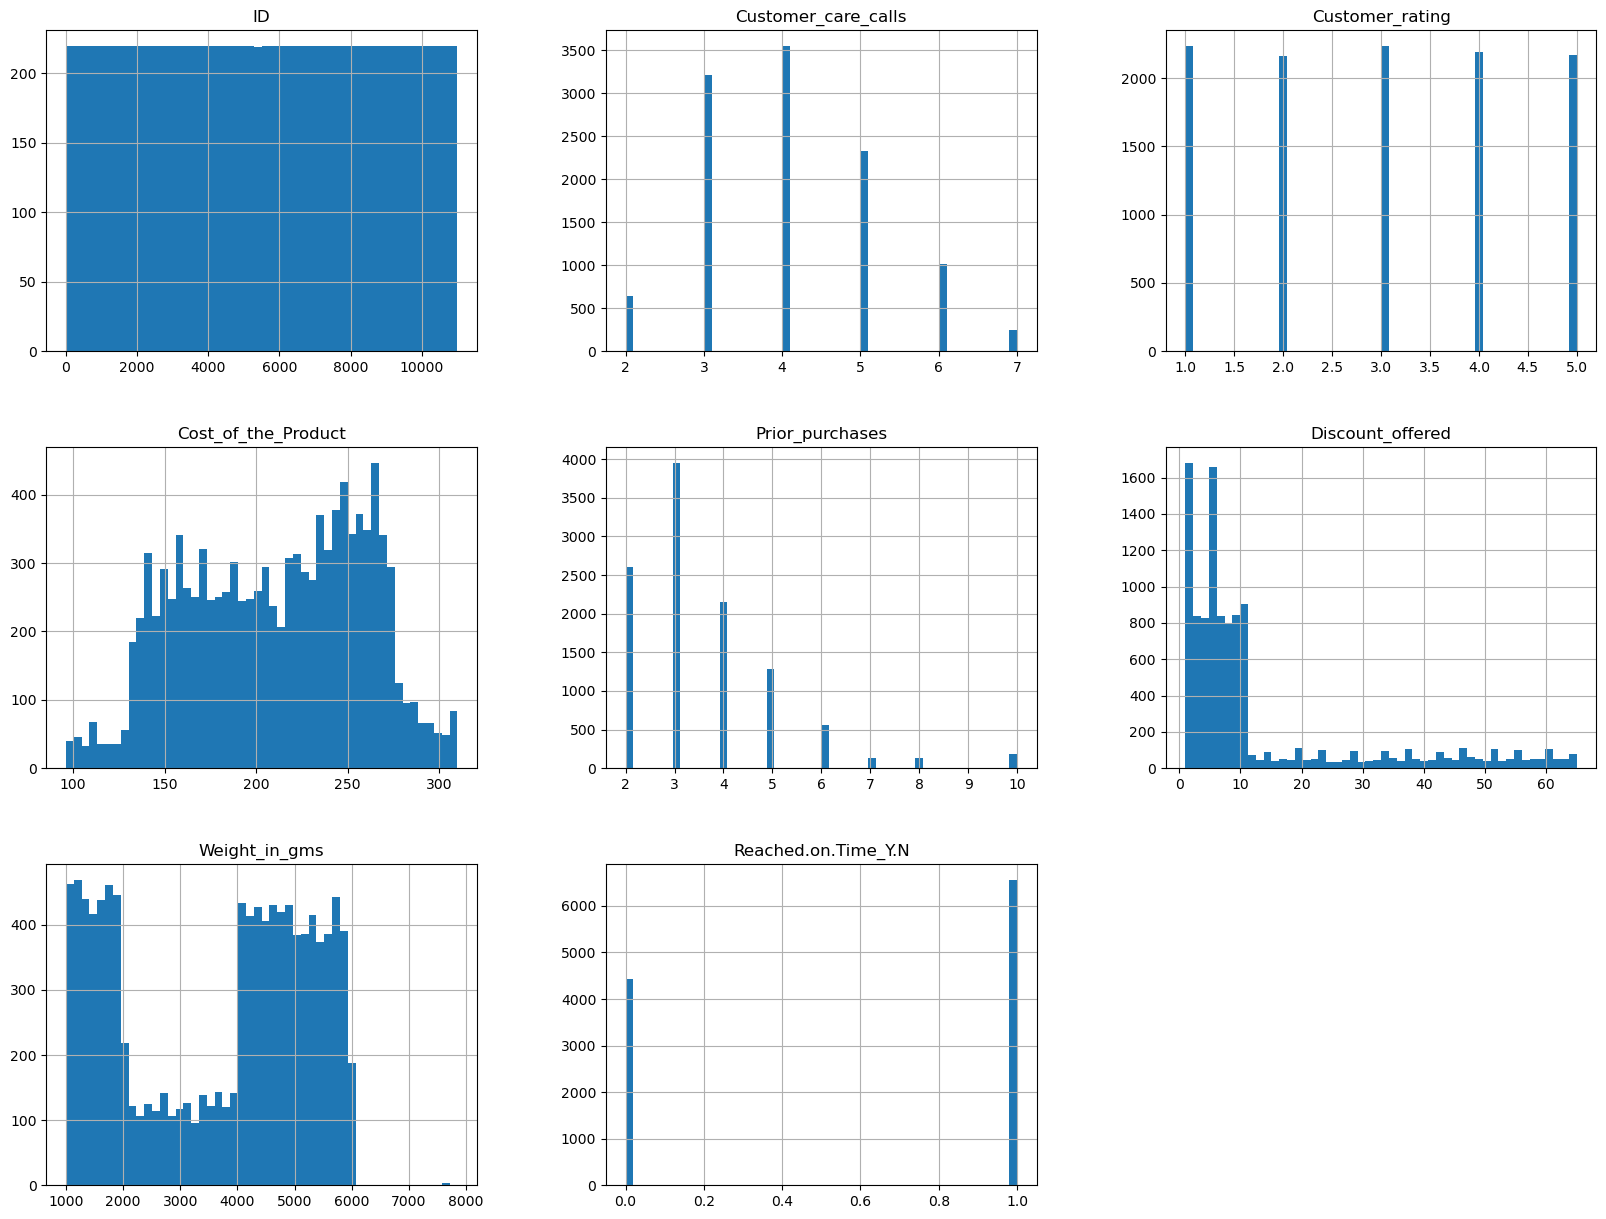

In [43]:
# Plot a histogram for each numerical attribute
df.hist(bins=50, figsize=(20,15))
plt.show()

- The customer rating histogram shows a concentration of ratings around the mid-range values (2.5 to 4.0), indicating room for improvement in overall customer rating.
- There appears to be a significant number of customer care calls for certain categories or groups, suggesting potential issues or areas requiring more support.
- The cost of the products shows a distribution with a peak around a certain price range, indicating a concentration of products within that cost range.
- The weight of the products also exhibits a distribution with specific weight ranges having a higher frequency, suggesting that most products fall within those weight categories.
- The prior purchases bar chart indicates that certain categories or groups tend to have higher numbers of prior purchases, potentially reflecting varying levels of customer loyalty or repeat business.
- The discount offered histogram shows a distribution of discounts, with most discounts falling within a particular range.

                           ID  Customer_care_calls  Customer_rating  \
ID                   1.000000             0.188998        -0.005722   
Customer_care_calls  0.188998             1.000000         0.012209   
Customer_rating     -0.005722             0.012209         1.000000   
Cost_of_the_Product  0.196791             0.323182         0.009270   
Prior_purchases      0.145369             0.180771         0.013179   
Discount_offered    -0.598278            -0.130750        -0.003124   
Weight_in_gms        0.278312            -0.276615        -0.001897   
Reached.on.Time_Y.N -0.411822            -0.067126         0.013119   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
ID                              0.196791         0.145369         -0.598278   
Customer_care_calls             0.323182         0.180771         -0.130750   
Customer_rating                 0.009270         0.013179         -0.003124   
Cost_of_the_Product             1.000000    

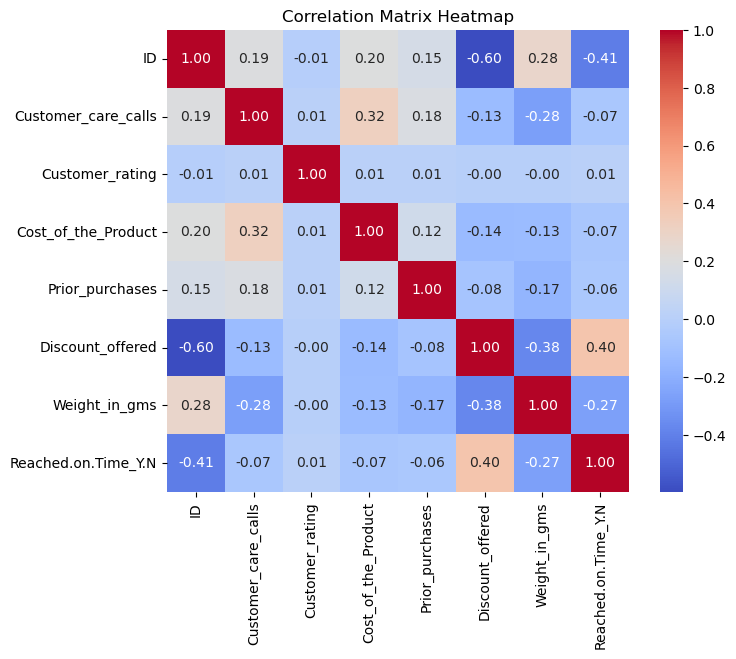

In [44]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_columns].corr()
print(corr_matrix)

# Plotting the heatmap using seaborn
plt.figure(figsize=(8, 6))  # Optional: adjust the figure size for better visibility
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

- The correlations are relatively weak, indicating less of a linear relationship between those pairs of variables.

# Business Background

The company is a well-established online retail store that deals in a wide variety of consumer goods. This company has a strong presence in the e-commerce market and ships products to customers nationwide. The business has multiple warehouse blocks (A, B, C, D, and E) from which it dispatches goods. Given the vast scale of operations, the company employs multiple modes of shipment, including flight, ship, and road, to ensure timely delivery of products.

# Business Problem
The company prides itself on providing excellent customer service and timely delivery. However, like many other e-commerce businesses, it faces challenges related to logistics, customer service, operational efficiency, and competitive market dynamics.

Creating a new table summarizing the distribution of "Satisfaction"  and 'Delivery_status' helps to quickly visualize, This summary is useful for identifying areas where the company may need to improve its services to increase customer satisfaction.

In [45]:
# Create a new column 'Delivery_status' based on 'Reached.on.Time_Y.N'
df['Delivery_status'] = df['Reached.on.Time_Y.N'].apply(lambda x: 'On Time' if x == 0 else 'Delay')


In [46]:
# Create a new column 'Satisfaction' based on 'Customer_rating'
df['Satisfaction'] = df['Customer_rating'].apply(lambda x: 'Dissatisfied' if x in [1, 2] else ('Neutral' if x == 3 else 'Satisfied'))

# Calculate distribution of satisfaction levels
satisfaction_distribution = df['Satisfaction'].value_counts()

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Delivery_status,Satisfaction
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Delay,Dissatisfied
1,2,E,Flight,4,5,216,2,low,M,59,3088,1,Delay,Satisfied
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Delay,Dissatisfied
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,Delay,Neutral
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Delay,Dissatisfied


In [47]:
# Calculate average delay rate for different categories
delay_by_shipment = df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean()
delay_by_importance = df.groupby('Product_importance')['Reached.on.Time_Y.N'].mean()
delay_by_prior_purchases = df.groupby('Prior_purchases')['Reached.on.Time_Y.N'].mean()
delay_by_care_calls = df.groupby('Customer_care_calls')['Reached.on.Time_Y.N'].mean()

print("Delay Rate by Mode of Shipment:")
print(delay_by_shipment)
print("\nDelay Rate by Product Importance:")
print(delay_by_importance)
print("\nDelay Rate by Prior Purchases:")
print(delay_by_prior_purchases)
print("\nDelay Rate by Customer Care Calls:")
print(delay_by_care_calls)

Delay Rate by Mode of Shipment:
Mode_of_Shipment
Flight    0.601576
Road      0.588068
Ship      0.597561
Name: Reached.on.Time_Y.N, dtype: float64

Delay Rate by Product Importance:
Product_importance
high      0.649789
low       0.592788
medium    0.590450
Name: Reached.on.Time_Y.N, dtype: float64

Delay Rate by Prior Purchases:
Prior_purchases
2     0.625240
3     0.640708
4     0.543387
5     0.498834
6     0.559715
7     0.676471
8     0.648438
10    0.573034
Name: Reached.on.Time_Y.N, dtype: float64

Delay Rate by Customer Care Calls:
Customer_care_calls
2    0.652038
3    0.625117
4    0.597695
5    0.584192
6    0.516288
7    0.516260
Name: Reached.on.Time_Y.N, dtype: float64


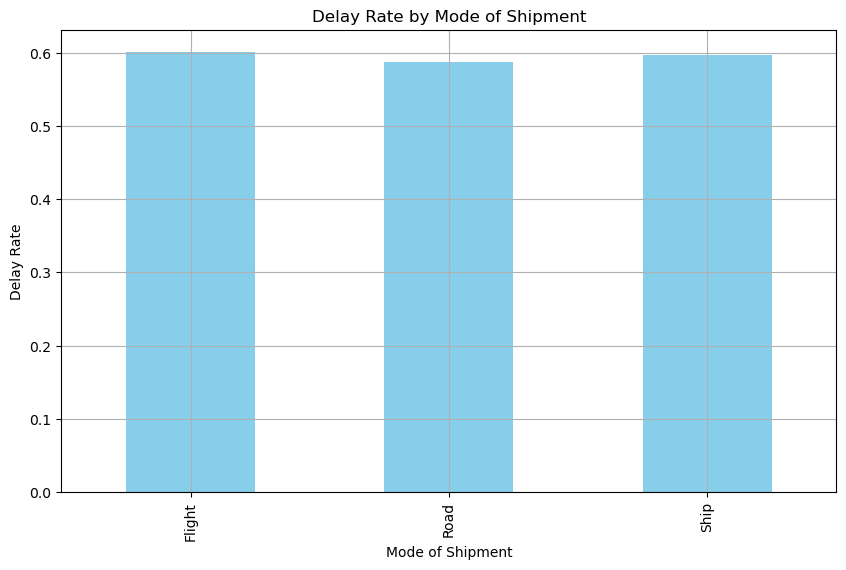

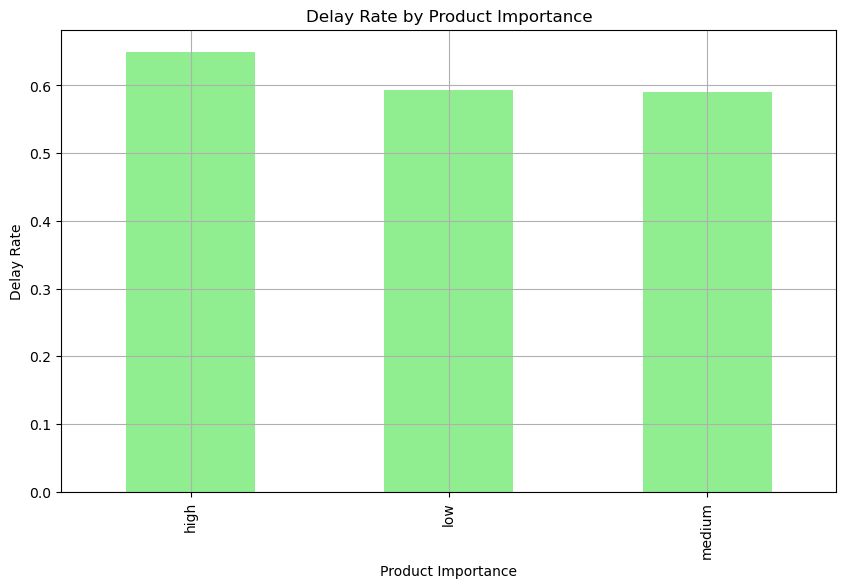

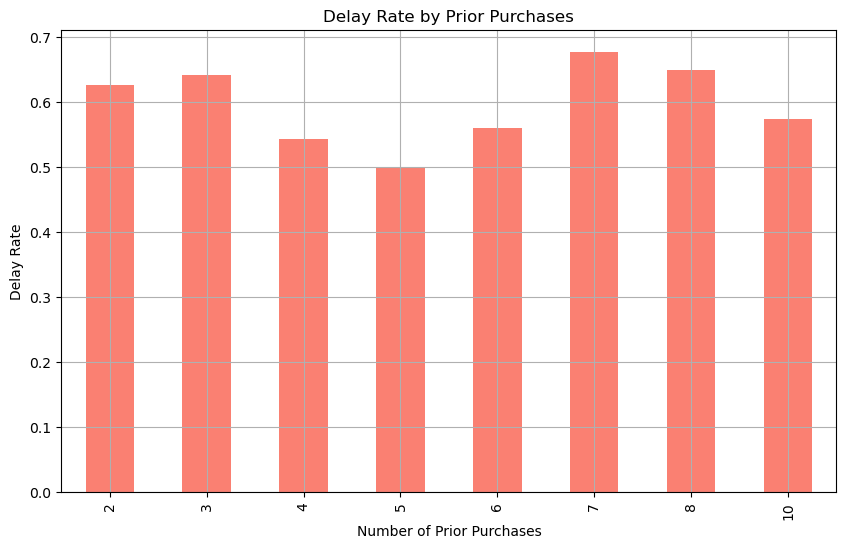

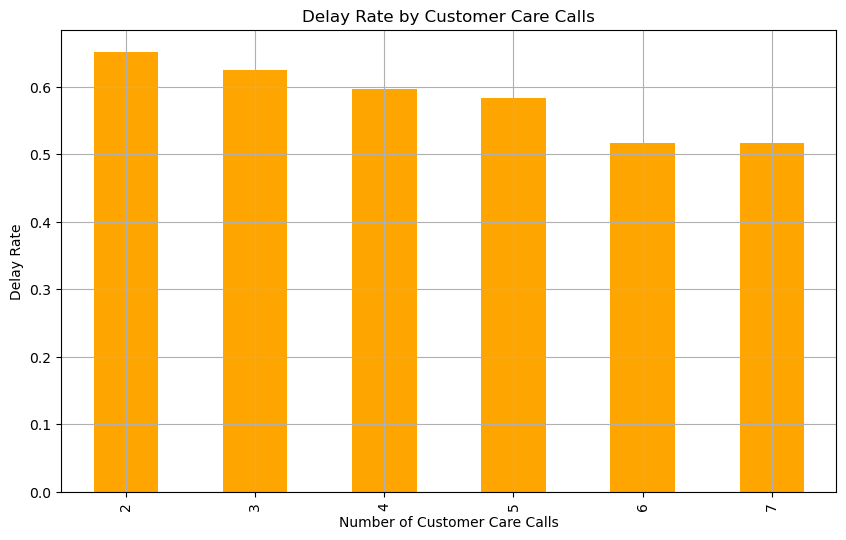

In [48]:
# Plot delay rates by mode of shipment
plt.figure(figsize=(10, 6))
delay_by_shipment.plot(kind='bar', color='skyblue')
plt.title('Delay Rate by Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Delay Rate')
plt.grid(True)
plt.show()

# Plot delay rates by product importance
plt.figure(figsize=(10, 6))
delay_by_importance.plot(kind='bar', color='lightgreen')
plt.title('Delay Rate by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Delay Rate')
plt.grid(True)
plt.show()

# Plot delay rates by prior purchases
plt.figure(figsize=(10, 6))
delay_by_prior_purchases.plot(kind='bar', color='salmon')
plt.title('Delay Rate by Prior Purchases')
plt.xlabel('Number of Prior Purchases')
plt.ylabel('Delay Rate')
plt.grid(True)
plt.show()

# Plot delay rates by customer care calls
plt.figure(figsize=(10, 6))
delay_by_care_calls.plot(kind='bar', color='orange')
plt.title('Delay Rate by Customer Care Calls')
plt.xlabel('Number of Customer Care Calls')
plt.ylabel('Delay Rate')
plt.grid(True)
plt.show()

- Flights have the highest delay rate, indicating that this mode of shipment is more prone to delays compared to road and ship transport.
- Products with high importance have a significantly higher delay rate, suggesting that more critical items may face more handling or prioritization issues leading to delays.
- Customers with 3 and 7 prior purchases face the highest delay rates. This irregular pattern suggests that there might be other underlying factors or specific customer groups that face more frequent delays.
- we observe that as the number of customer care calls increases, the delay rate generally decreases. This could imply that customers who have to make more calls are experiencing issues that eventually get resolved, leading to fewer delays as the number of calls increases. Alternatively, it might suggest that issues leading to multiple calls are more effectively addressed by the support team, reducing delays.

In [49]:
# Analyze the distribution of delivery status
delivery_status_counts = df['Delivery_status'].value_counts()
print("\nDelivery Status Distribution:\n", delivery_status_counts)

# Analyze the distribution of customer satisfaction
satisfaction_counts = df['Satisfaction'].value_counts()
print("\nCustomer Satisfaction Distribution:\n", satisfaction_counts)

# Crosstab to see the relationship between delivery status and customer satisfaction
crosstab = pd.crosstab(df['Delivery_status'], df['Satisfaction'])
print("\nCrosstab of Delivery Status and Customer Satisfaction:\n", crosstab)



Delivery Status Distribution:
 Delivery_status
Delay      6563
On Time    4436
Name: count, dtype: int64

Customer Satisfaction Distribution:
 Satisfaction
Dissatisfied    4400
Satisfied       4360
Neutral         2239
Name: count, dtype: int64

Crosstab of Delivery Status and Customer Satisfaction:
 Satisfaction     Dissatisfied  Neutral  Satisfied
Delivery_status                                  
Delay                    2586     1357       2620
On Time                  1814      882       1740


- 2586 out of 6563 delayed shipments resulted in dissatisfied customers (approximately 39% of delayed shipments).
- 1814 out of 4436 on-time shipments resulted in dissatisfied customers (approximately 41% of on-time shipments).
- 2620 out of 6563 delayed shipments resulted in satisfied customers (approximately 40% of delayed shipments).
- 1740 out of 4436 on-time shipments resulted in satisfied customers (approximately 39% of on-time shipments).
- 1357 out of 6563 delayed shipments resulted in neutral customers (approximately 21% of delayed shipments).
- 882 out of 4436 on-time shipments resulted in neutral customers (approximately 20% of on-time shipments).

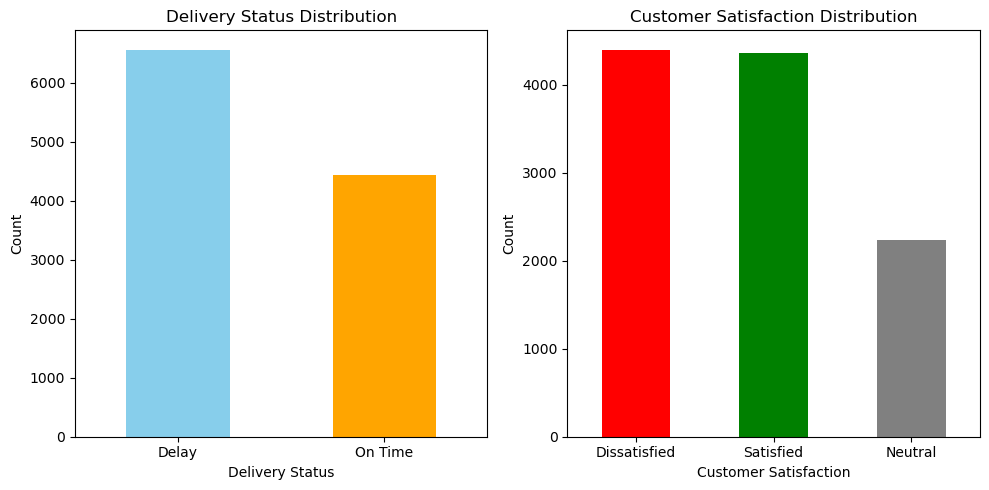

In [50]:
# Data for visualizations
delivery_status_counts = df['Delivery_status'].value_counts()
satisfaction_counts = df['Satisfaction'].value_counts()

# Plotting Delivery Status Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
delivery_status_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plotting Customer Satisfaction Distribution
plt.subplot(1, 2, 2)
satisfaction_counts.plot(kind='bar', color=['red', 'green', 'gray'])
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

- Delivery status distribution chart shows that there were significantly more delayed deliveries (blue bar) compared to on-time deliveries (orange bar).
- Customer satisfaction distribution chart reveals that the number of satisfied customers (green bar) is slightly higher than the number of dissatisfied customers (red bar). There is also a smaller group of neutral customers (gray bar).
- While the delivery delays were high, the customer satisfaction levels appear to be relatively balanced, with a slight majority expressing satisfaction despite the delivery issues.

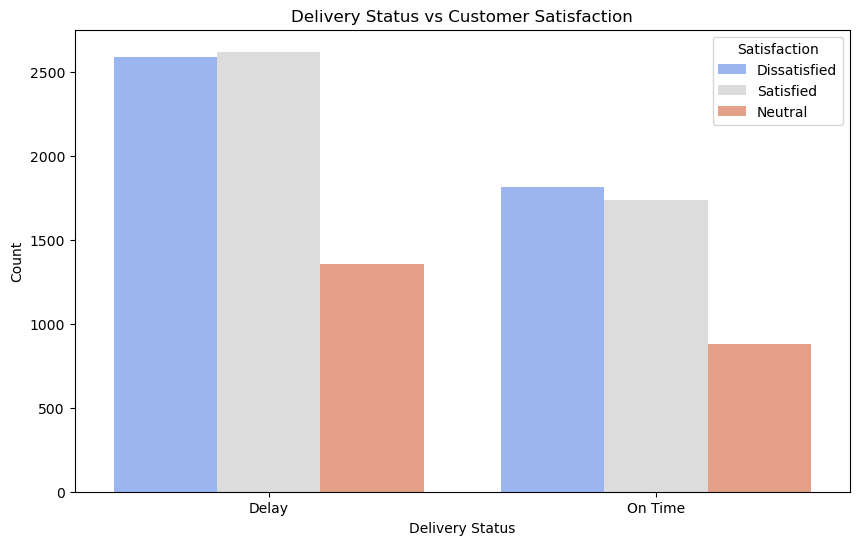

In [51]:
# Delivery Status vs Customer Satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(x='Delivery_status', hue='Satisfaction', data=df, palette='coolwarm')
plt.title('Delivery Status vs Customer Satisfaction')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.show()

- Delivery delays result in a significantly higher number of dissatisfied customers compared to on-time deliveries. The count of dissatisfied customers is much higher in the case of delays.
- However, the number of satisfied customers in the case of delays is also quite high, although lower than for on-time deliveries. This suggests that some customers are still able to tolerate delays reasonably well.
- For on-time deliveries, the number of satisfied and dissatisfied customers is almost balanced, with a slightly higher number of satisfied customers. This indicates that on-time delivery does not necessarily guarantee complete customer satisfaction.
- The number of neutral customers is relatively low compared to satisfied and dissatisfied ones, for both delays and on-time deliveries. This suggests that most customers tend to have a clear opinion, whether satisfied or dissatisfied, regarding the delivery status.

/var/folders/xj/k3fw2zq952912hsnf6hpngx40000gn/T/ipykernel_44210/2087696059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Satisfaction', y='Discount_offered', data=df, palette='coolwarm')


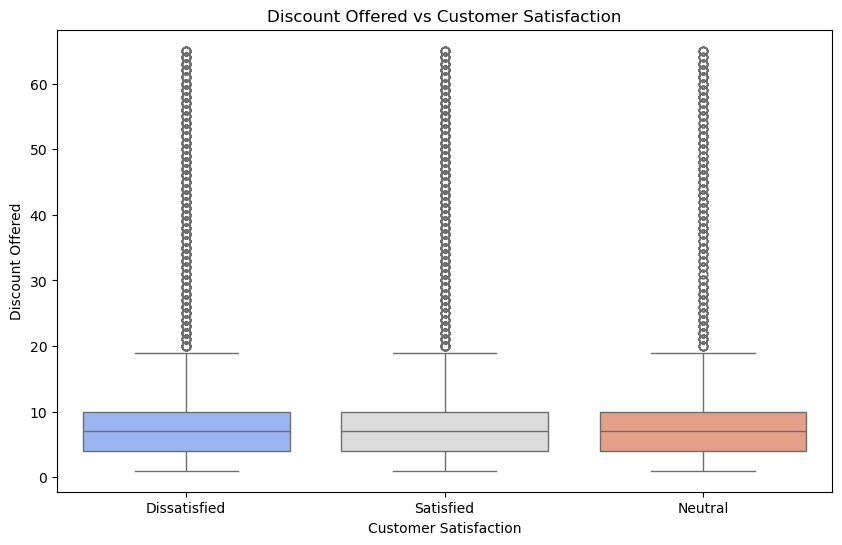

In [52]:
# Discount Offered vs Customer Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction', y='Discount_offered', data=df, palette='coolwarm')
plt.title('Discount Offered vs Customer Satisfaction')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Discount Offered')
plt.show()

- The number of dissatisfied customers is relatively low even when no discount is offered. This suggests that factors other than discounts play a significant role in customer satisfaction.
- Offering a discount leads to a sharp increase in the number of satisfied customers compared to not offering any discount. This highlights the positive impact discounts can have on customer satisfaction.
- However, despite offering a discount, there is still a notable number of neutral customers. This implies that discounts alone may not be enough to sway some customers towards being fully satisfied or dissatisfied.
- The number of neutral customers remains relatively consistent regardless of whether a discount is offered or not. This could indicate that a certain segment of customers is indifferent to discounts and their satisfaction levels are influenced by other factors.

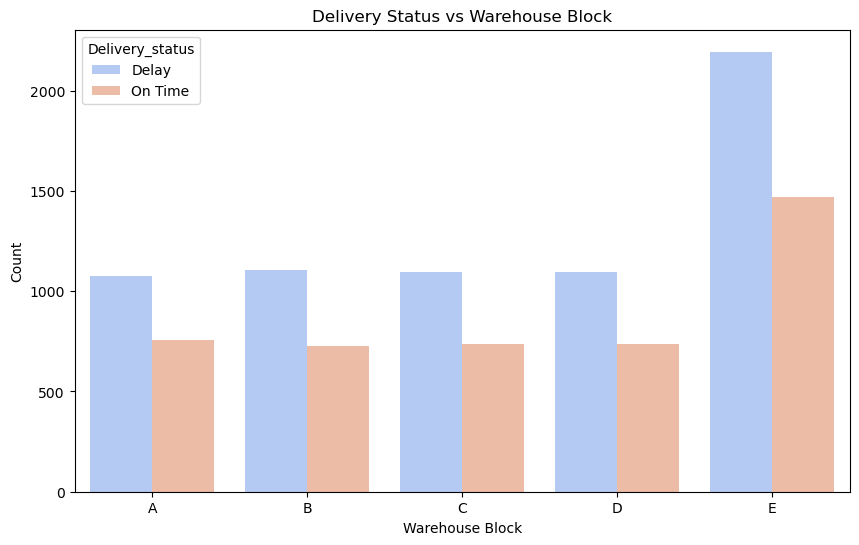

In [54]:
# Delivery Status vs Warehouse Block
plt.figure(figsize=(10, 6))
sns.countplot(x='Warehouse_block', hue='Delivery_status', data=df, palette='coolwarm', order=['A', 'B', 'C', 'D', 'E'])
plt.title('Delivery Status vs Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.show()

- Across all warehouse blocks, there is a higher count of delayed deliveries (represented by the blue bars) compared to on-time deliveries (represented by the green bars).
- Warehouse block E has the highest overall count of deliveries, with a significantly larger portion of delayed deliveries compared to on-time deliveries.
- Warehouse blocks A, C, and D exhibit a relatively balanced distribution between delayed and on-time deliveries, with delays still being slightly higher.